In [1]:
import numpy as np
import pandas as pd
from FTS import fts_util
from PyEMD import EMD
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
cores = sns.color_palette(n_colors=21)
warnings.filterwarnings('ignore')

## Grid Search in TAIEX Time Series

In [2]:
# read tsfcm_labels
ts = pd.read_csv('../../data/csv/stock/TAIEX_1992.csv', index_col=[0], parse_dates=[0])
col = ts.keys().to_list()[0]

file_results = 'Resultados/QE_GS_TAIEX_1992.csv'

# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ts[col].values)

ts[col].values.shape

limite = ts[col].values.shape[0]

In [3]:
#fts_util.plot_imfs(ala[col].values, imfs, fs=(20,15))

''' Select MFIs without trending and noise behavior '''

df_fts = pd.DataFrame(ts[col].copy())
df_fts[col] = ts

col_imf = '2+3+residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

In [4]:
from FTS.Models.MV_Lee import STFMV_Convencional
model = STFMV_Convencional()

In [5]:
for k in range(2, limite):
    # run model
    model.fit(X=df_fts[[col, col_imf]].values, k=k)
    mape, mae, mse, rmse, dtw = model.predict(plot=False, SM=False)
    
    # verify and save 
    experimento = {'IMF':col_imf, 'Quantidade':k, 'MAPE':mape, 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'DTW':dtw}
    fts_util.update_values_exp(experimento, key_words=['IMF','Quantidade', 'MSE'], file=file_results, log=False)

In [6]:
df_view = pd.read_csv(file_results, index_col=['Quantidade'])
df_view

,IMF,MAPE,MAE,MSE,RMSE,DTW
Quantidade,,,,,,
2,2+3+residue,4.50,195.91,58126.60,241.09,97.956453
3,2+3+residue,3.03,128.05,27737.99,166.55,62.846263
4,2+3+residue,2.39,101.61,17198.26,131.14,49.075053
5,2+3+residue,2.06,86.49,11931.18,109.23,41.806555
6,2+3+residue,1.76,75.50,10114.64,100.57,34.638697
7,2+3+residue,1.68,71.50,8379.14,91.54,32.631503
8,2+3+residue,1.57,66.79,7456.88,86.35,30.251446
9,2+3+residue,1.38,58.49,5657.03,75.21,25.748727
10,2+3+residue,1.28,53.54,4905.14,70.04,22.593779


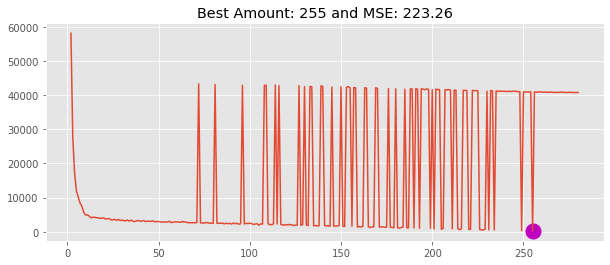

In [8]:
best = fts_util.best_GS(df_view, 'MSE')

plt.figure(figsize=(10,4))
plt.plot(best.index.values[0], best['MSE'].values[0], '-mo', markersize=15)
plt.title('Best Amount: {} and MSE: {}'.format(best.index.values[0], best['MSE'].values[0]))
plt.plot(df_view['MSE'], '-')
# for i in range(df_view.shape[0]):
#     plt.annotate(df_view.index[i], (df_view.index[i], df_view['MSE'].iloc[i]))
plt.show()